In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

%config InlineBackend.figure_format ='retina' 

### Задание.

Сгенерируйте выборку $X_1, ..., X_N$ из стандартного нормального распределения для
$N = 10^4.$ Для всех $n\leq N$ посчитайте по ней эмпирическую
функцию распределения. Для некоторых $n$ (например, $n \in \{10, 25,
50, 100, 1000, N\}$) постройте графики эмпи\-рической функции
распределения (отметьте на оси абсцисс точки "скачков" кривых,
нанеся каждую из "подвыборок" на ось абсцисс на каждом
соответствующем графике с коэффициентом прозрачности 0.2), нанеся на
каждый из них истинную функцию распределения (количество графиков
равно количеству различныз значений $n$). 

Будет полезно: https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html

In [36]:
from scipy.stats import norm

In [37]:
def ecdf(n):
    X = np.sort(norm.rvs(size = n))
    n = X.size
    y = np.arange(1, n+1) /n
    plt.figure(figsize = (8,6))
    plt.scatter(X,y,alpha=0.2,  color = 'r')
    plt.step(X, y)
    grid = np.linspace(st.norm.ppf(0.001, loc=0, scale=1), st.norm.ppf(0.999, loc=0, scale=1), 100)
    plt.plot(grid, st.norm.cdf(grid, scale=1))
    plt.show()

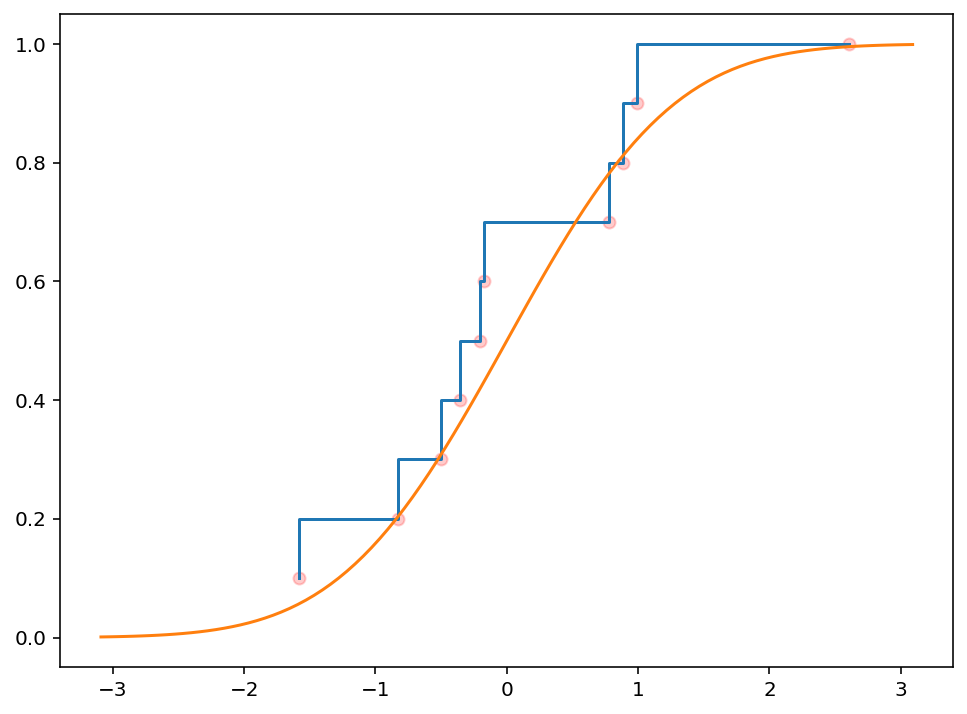

In [40]:
ecdf(10)

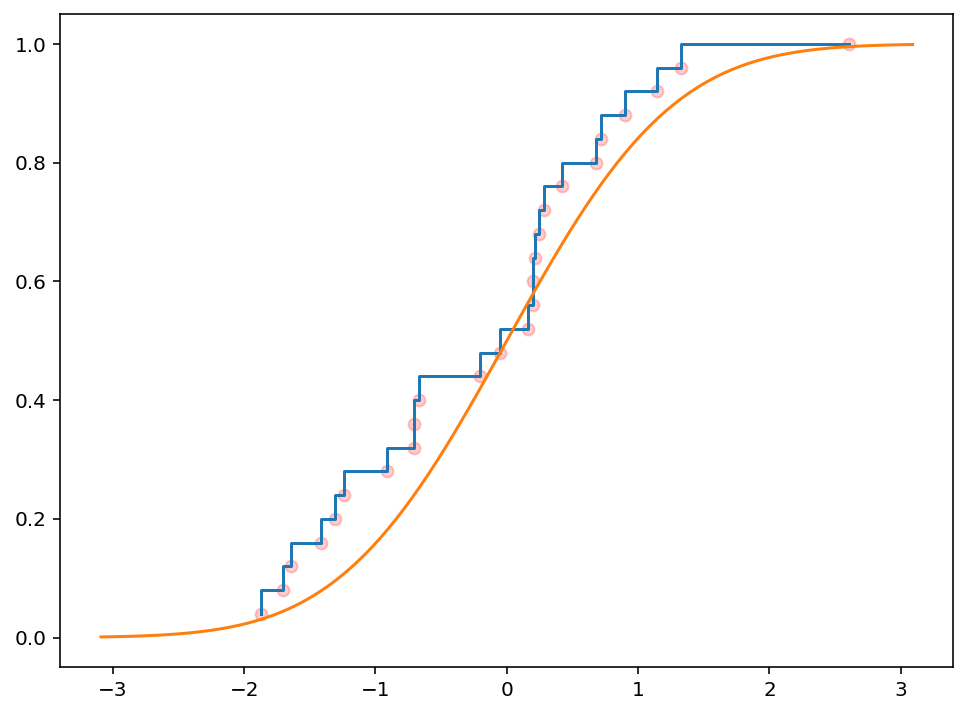

In [41]:
ecdf(25)

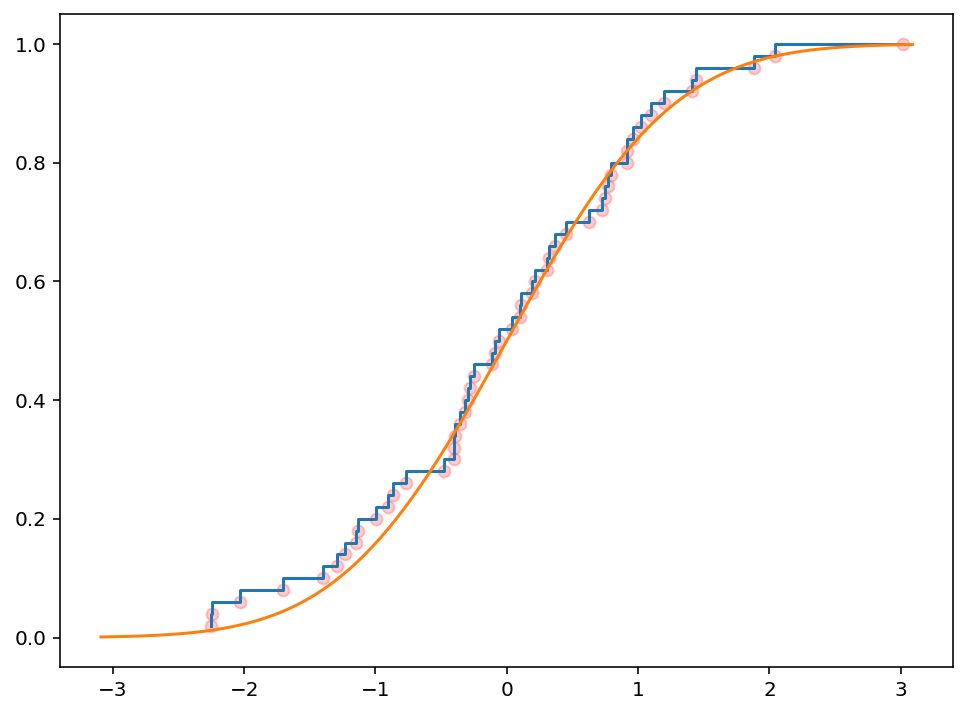

In [42]:
ecdf(50)

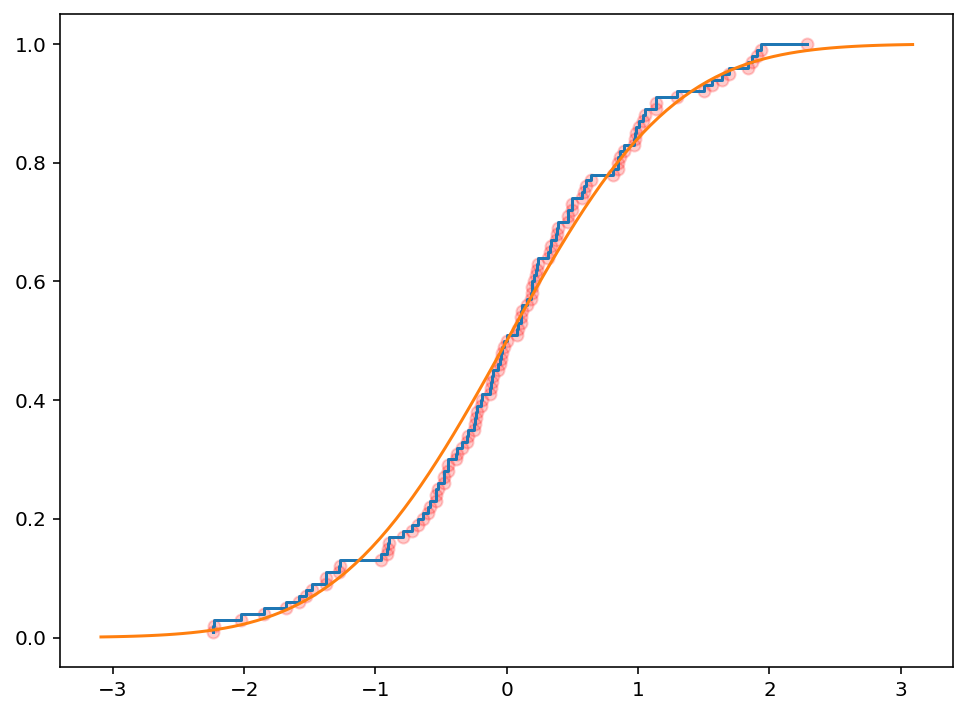

In [43]:
ecdf(100)

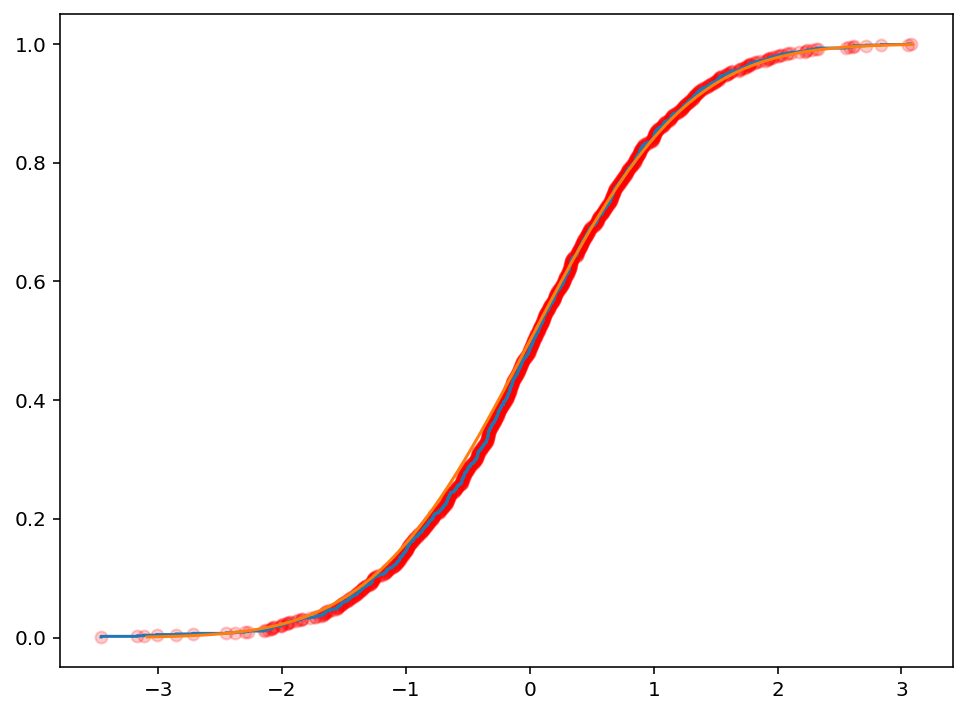

In [44]:
ecdf(1000)

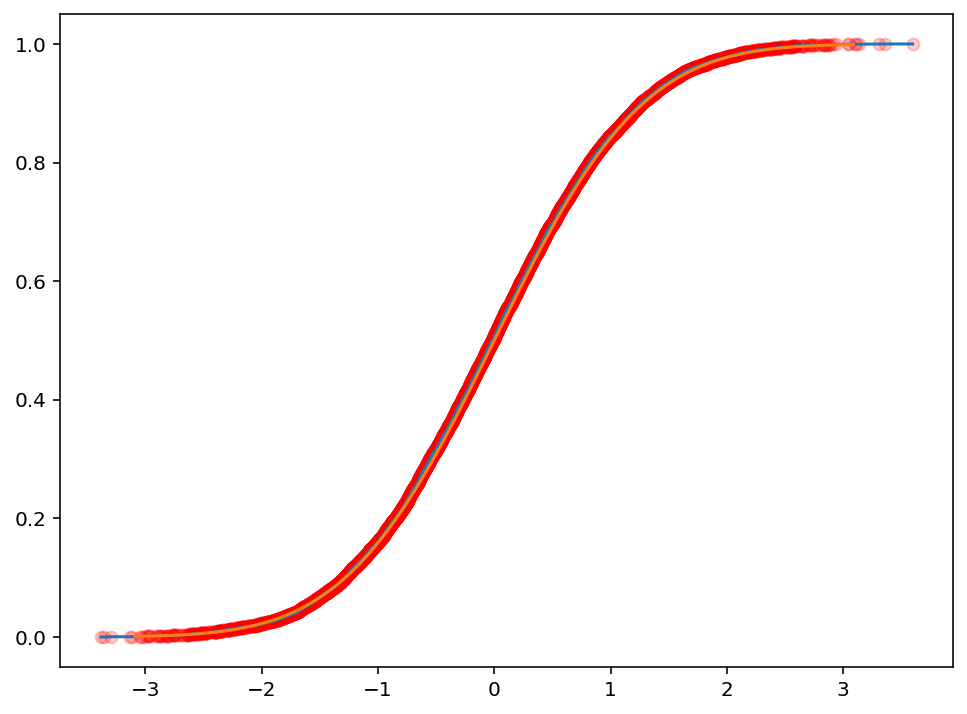

In [45]:
ecdf(10000)

То же самое без написания собственной функции:

<AxesSubplot:ylabel='Proportion'>

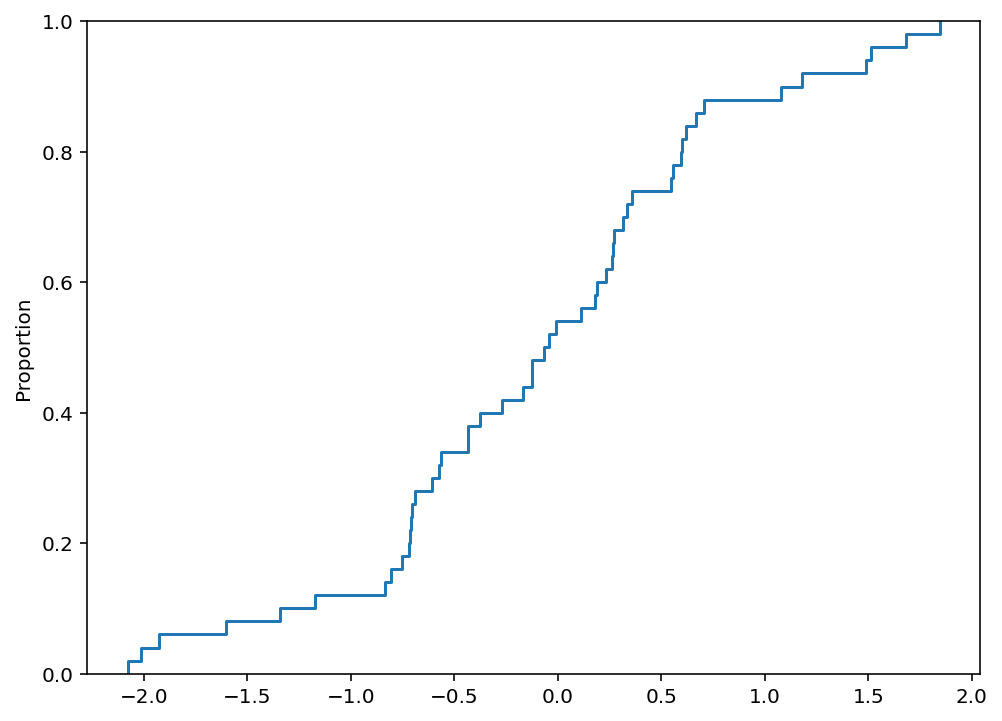

In [49]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.ecdfplot(norm.rvs(size = 50))

# Задание 2 и 3

Посмотрим, как распределенно значение выборки, соотвествующей $Bin(n ,p)$. Поскольку во втором и третьем значение с.в. $X = 0$ будет соотвествовать "успеху" (выпало число 6 или выпал герб), $X = 1$ - "не успеху". Требуется посчитать $P( a < \sum\limits_{i=1}^n X_i < b )$. Оценим данное число с помощью ЦПТ:

$$\frac{\sum\limits_{i=1}^nX_i - \mathbb{E}\sum\limits_{i=1}^nX_i}{\sigma} \to^d \mathcal{N}(0,1)$$


Для $Bin(n,p)$:  $\mathbb{E}\sum\limits_{i=1}^nX_i = np, \sigma = \sqrt{npq}$

$$\frac{1}{\sqrt{npq}}\cdot(\sum\limits_{i=1}^nX_i - np) \to^d \mathcal{N}(0,1)$$


$$\sum\limits_{i=1}^nX_i \to^d \mathcal{N}(np,{(\sqrt{npq})}^2)$$


Для задачи 2: $p = \frac{1}{6}, q = \frac{5}{6}, n = 120, a = 30, b = 50$. Проиллюстрируем:

Площадь P(a < X < b)(Ответ на задачу): 0.0071529392


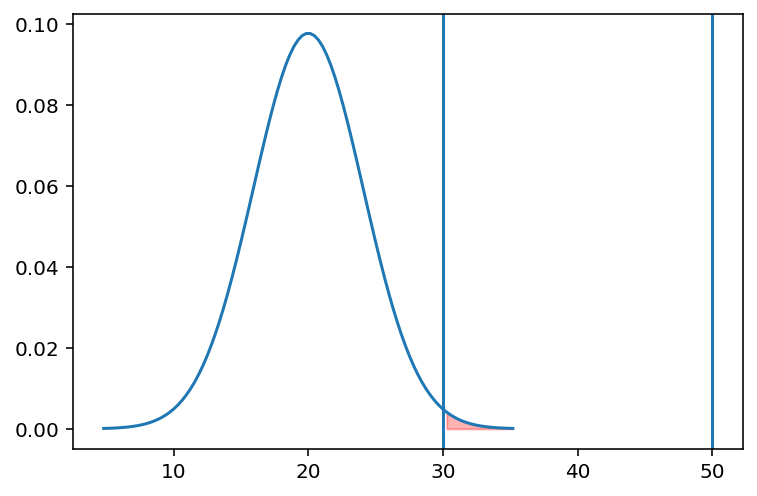

In [50]:
n = 120
p = 1/6
q = 5/6
sgm = np.sqrt(n*p*q)
e = n*p
a = 30
b = 50
print('Площадь P(a < X < b)(Ответ на задачу):', '%.10f' % (st.norm.cdf(b, loc = e, scale=sgm) - st.norm.cdf(a, loc = e, scale=sgm)))

grid = np.linspace(st.norm.ppf(0.0001, loc=e, scale=sgm), st.norm.ppf(0.9999, loc=e, scale=sgm), 100)

plt.axvline(a)
plt.axvline(b)
plt.plot(grid, st.norm.pdf(grid, loc = e, scale=sgm))
plt.fill_between(grid[(grid>a) & (grid<b)], st.norm.pdf(grid[(grid>a) & (grid<b)], loc=e, scale=sgm), color="red", alpha=0.3)
plt.show()

Для задачи 3: $p = \frac{1}{2}, q = \frac{1}{2}, n = 10000, a = 4900, b = 5100$. Проиллюстрируем:

Площадь P(a < X < b)(Ответ на задачу): 0.9544997361


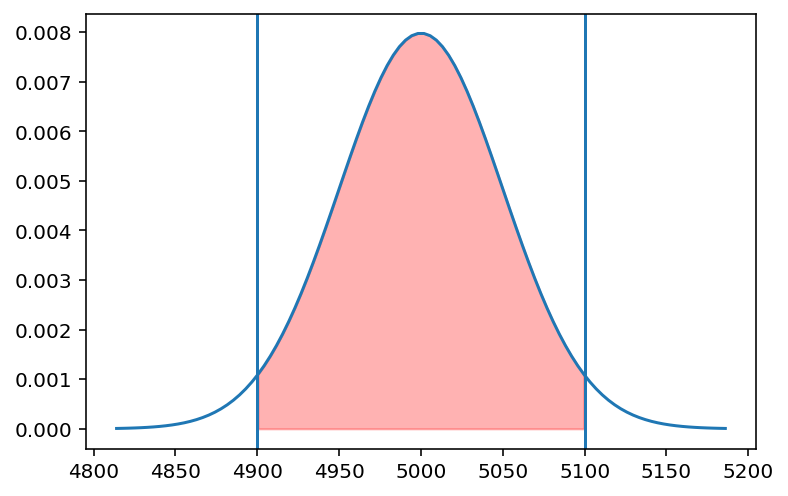

In [51]:
n = 10000
p = 1/2
q = 1/2
sgm = np.sqrt(n*p*q)
e = n*p
a = 4900
b = 5100
print('Площадь P(a < X < b)(Ответ на задачу):', '%.10f' % (st.norm.cdf(b, loc = e, scale=sgm) - st.norm.cdf(a, loc = e, scale=sgm)))

grid = np.linspace(st.norm.ppf(0.0001, loc=e, scale=sgm), st.norm.ppf(0.9999, loc=e, scale=sgm), 100)

plt.axvline(a)
plt.axvline(b)
plt.plot(grid, st.norm.pdf(grid, loc = e, scale=sgm))
plt.fill_between(grid[(grid>a) & (grid<b)], st.norm.pdf(grid[(grid>a) & (grid<b)], loc=e, scale=sgm), color="red", alpha=0.3)
plt.show()